# Pull images for JUMP ORFs

This notebook demonstrates how to retrieve images using jump_portrait.
It also has a function for plotting one site from each channel.

In [4]:
import matplotlib.colors as mpl  # noqa: CPY001
import numpy as np
import polars as pl
from jump_portrait.fetch import get_item_location_info, get_jump_image
from matplotlib import pyplot as plt

In [1]:
def plot_gene(gene: str, img_ind: int, int_percentile: float, img_type: str) -> None:
    """Plot all channels from one image.

    Parameters
    ----------
    gene : String
        Which gene to retrieve an image for.
    img_ind : int
        There are many images corresponding to each gene. Index of the image to be plotted.
    int_percentile: float
        Rescale the image from 0 - this percentile of intensity values.
    img_type: String
        Do you want to display images for "gene" or for a control on the same plate?
        Possible values are "perturbation" and "control".

    """
    channels = ["DNA", "ER", "Mito", "AGP", "RNA"]

    if img_type == "control":
        source, batch, plate, well, site, *rest = (
            get_item_location_info(gene)
            .filter((pl.col("standard_key") == "control") & (pl.col("Metadata_PlateType") == "ORF"))
            .row(img_ind)
        )
        label = "Negcon on " + gene + " plate"
    elif img_type == "perturbation":
        source, batch, plate, well, site, *rest = (
            get_item_location_info(gene)
            .filter((pl.col("standard_key") != "control") & (pl.col("Metadata_PlateType") == "ORF"))
            .row(img_ind)
        )
        label = gene

    n_rows = 2
    n_cols = 3

    # Make images
    axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 6 * n_rows))[1]
    axes = axes.ravel()
    counter = 0

    for channel in channels:
        if channel == "ER":
            cmap = mpl.LinearSegmentedColormap.from_list("green_cmap", ["#000", "#65fe08"])
        elif channel == "DNA":
            cmap = mpl.LinearSegmentedColormap.from_list("green_cmap", ["#000", "#0000FF"])
        elif channel == "Mito":
            cmap = mpl.LinearSegmentedColormap.from_list("green_cmap", ["#000", "#FF0000"])
        elif channel == "AGP":
            cmap = mpl.LinearSegmentedColormap.from_list("green_cmap", ["#000", "#FFFF00"])
        elif channel == "RNA":
            cmap = mpl.LinearSegmentedColormap.from_list("green_cmap", ["#000", "#FFA500"])
        else:
            cmap = "gray"

        img = get_jump_image(source, batch, plate, well, channel, site, None)

        ax = axes[counter]
        ax.imshow(img, vmin=0, vmax=np.percentile(img, int_percentile), cmap=cmap)
        ax.axis("off")
        counter += 1

    # put label in last subplot
    ax = axes[counter]
    ax.text(
        0.5,
        0.5,
        label,
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=30,
        color="black",
        transform=ax.transAxes,
    )
    ax.axis("off")

    # show plot
    plt.tight_layout()
    plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]



  0%|          | 0/1 [00:00<?, ?it/s]




  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]






  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]








  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:00<00:00,  2.71it/s]




100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


100%|██████████| 1/1 [00:00<00:00,  2.43it/s]







100%|██████████| 1/1 [00:00<00:00,  2.57it/s]






100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

100%|██████████| 1/1 [00:00<00:00,  2.26it/s]





100%|██████████| 1/1 [00:00<00:00,  2.13it/s]



100%|██████████| 1/1 [00:00<00:00,  2.09it/s]









100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

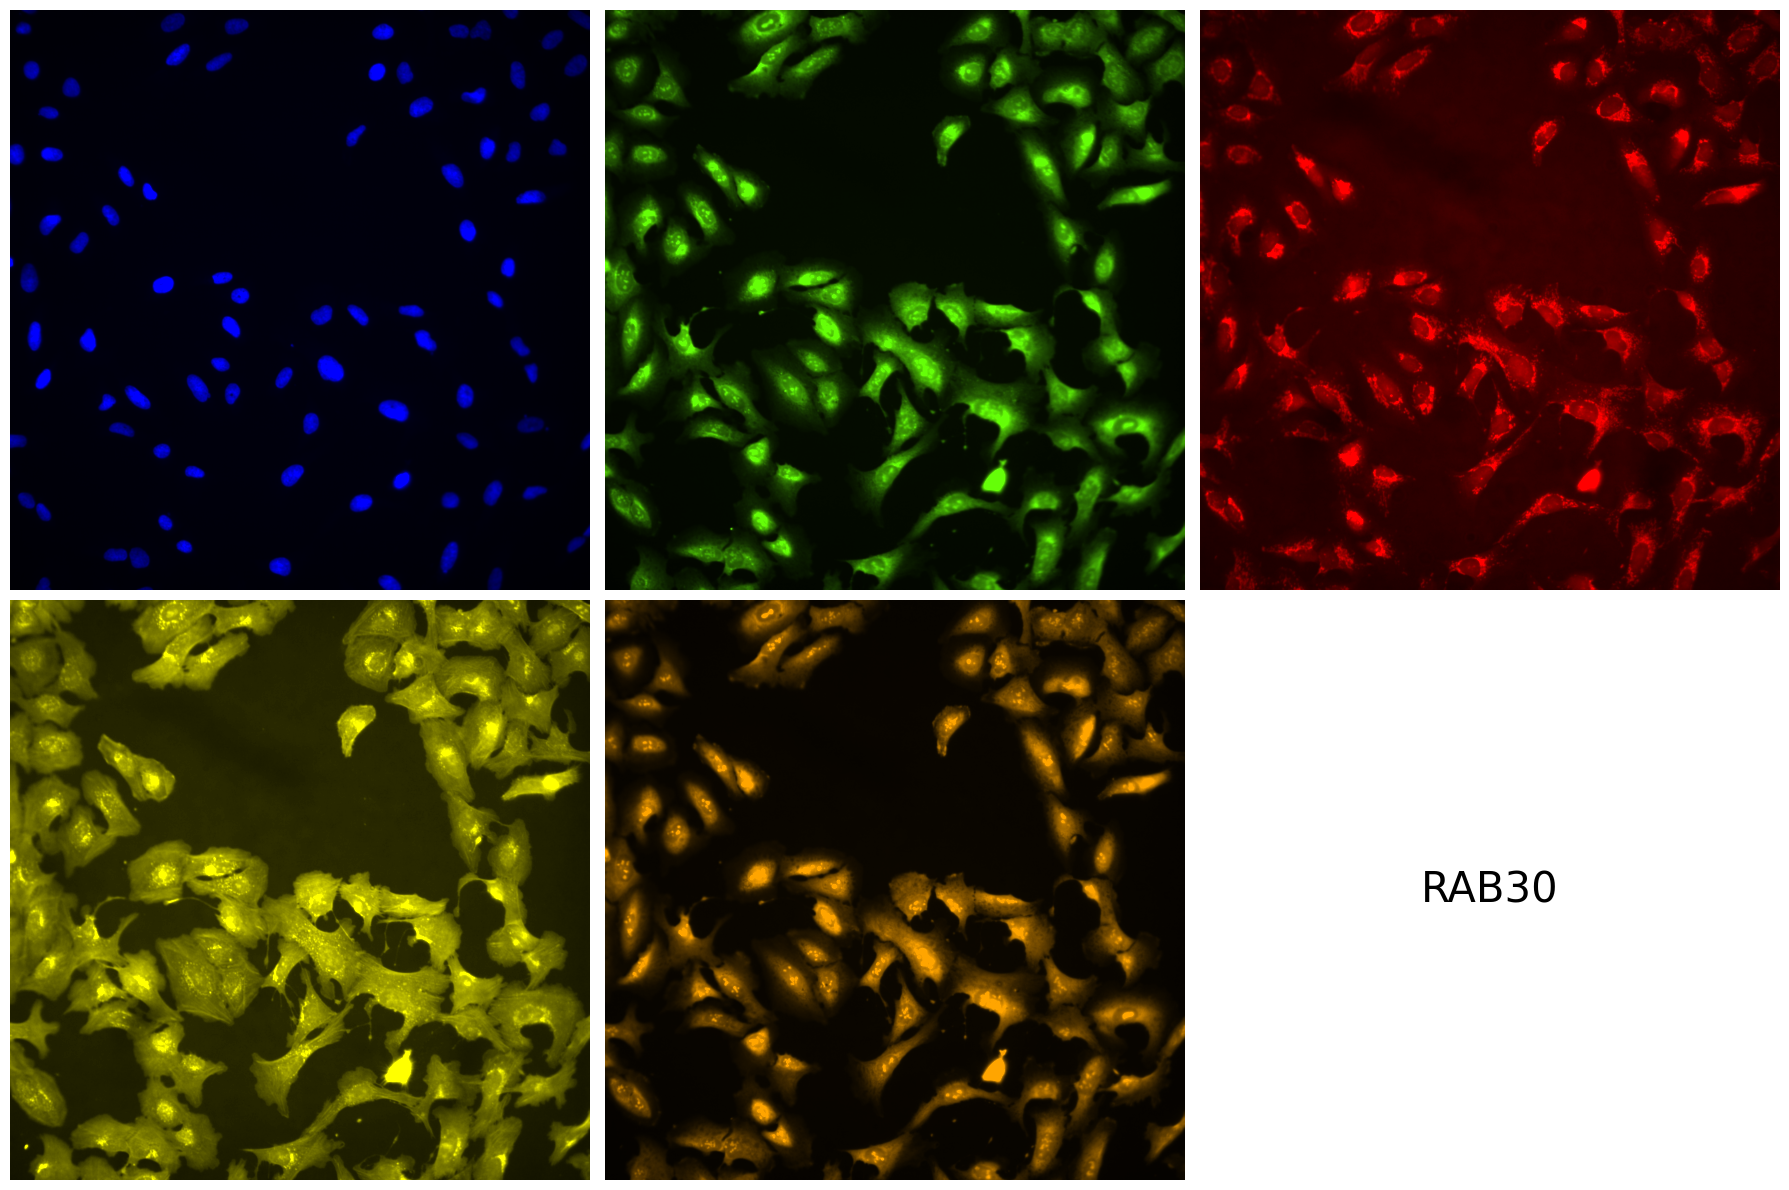

In [8]:
plot_gene(gene="RAB30", img_ind=100, int_percentile=99.25, img_type="perturbation")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]



  0%|          | 0/1 [00:00<?, ?it/s]




  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]






  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]








  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

100%|██████████| 1/1 [00:00<00:00,  2.82it/s]



100%|██████████| 1/1 [00:00<00:00,  2.66it/s]








100%|██████████| 1/1 [00:00<00:00,  3.15it/s]






100%|██████████| 1/1 [00:00<00:00,  2.75it/s]





100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


100%|██████████| 1/1 [00:00<00:00,  2.27it/s]







100%|██████████| 1/1 [00:00<00:00,  2.52it/s]









100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

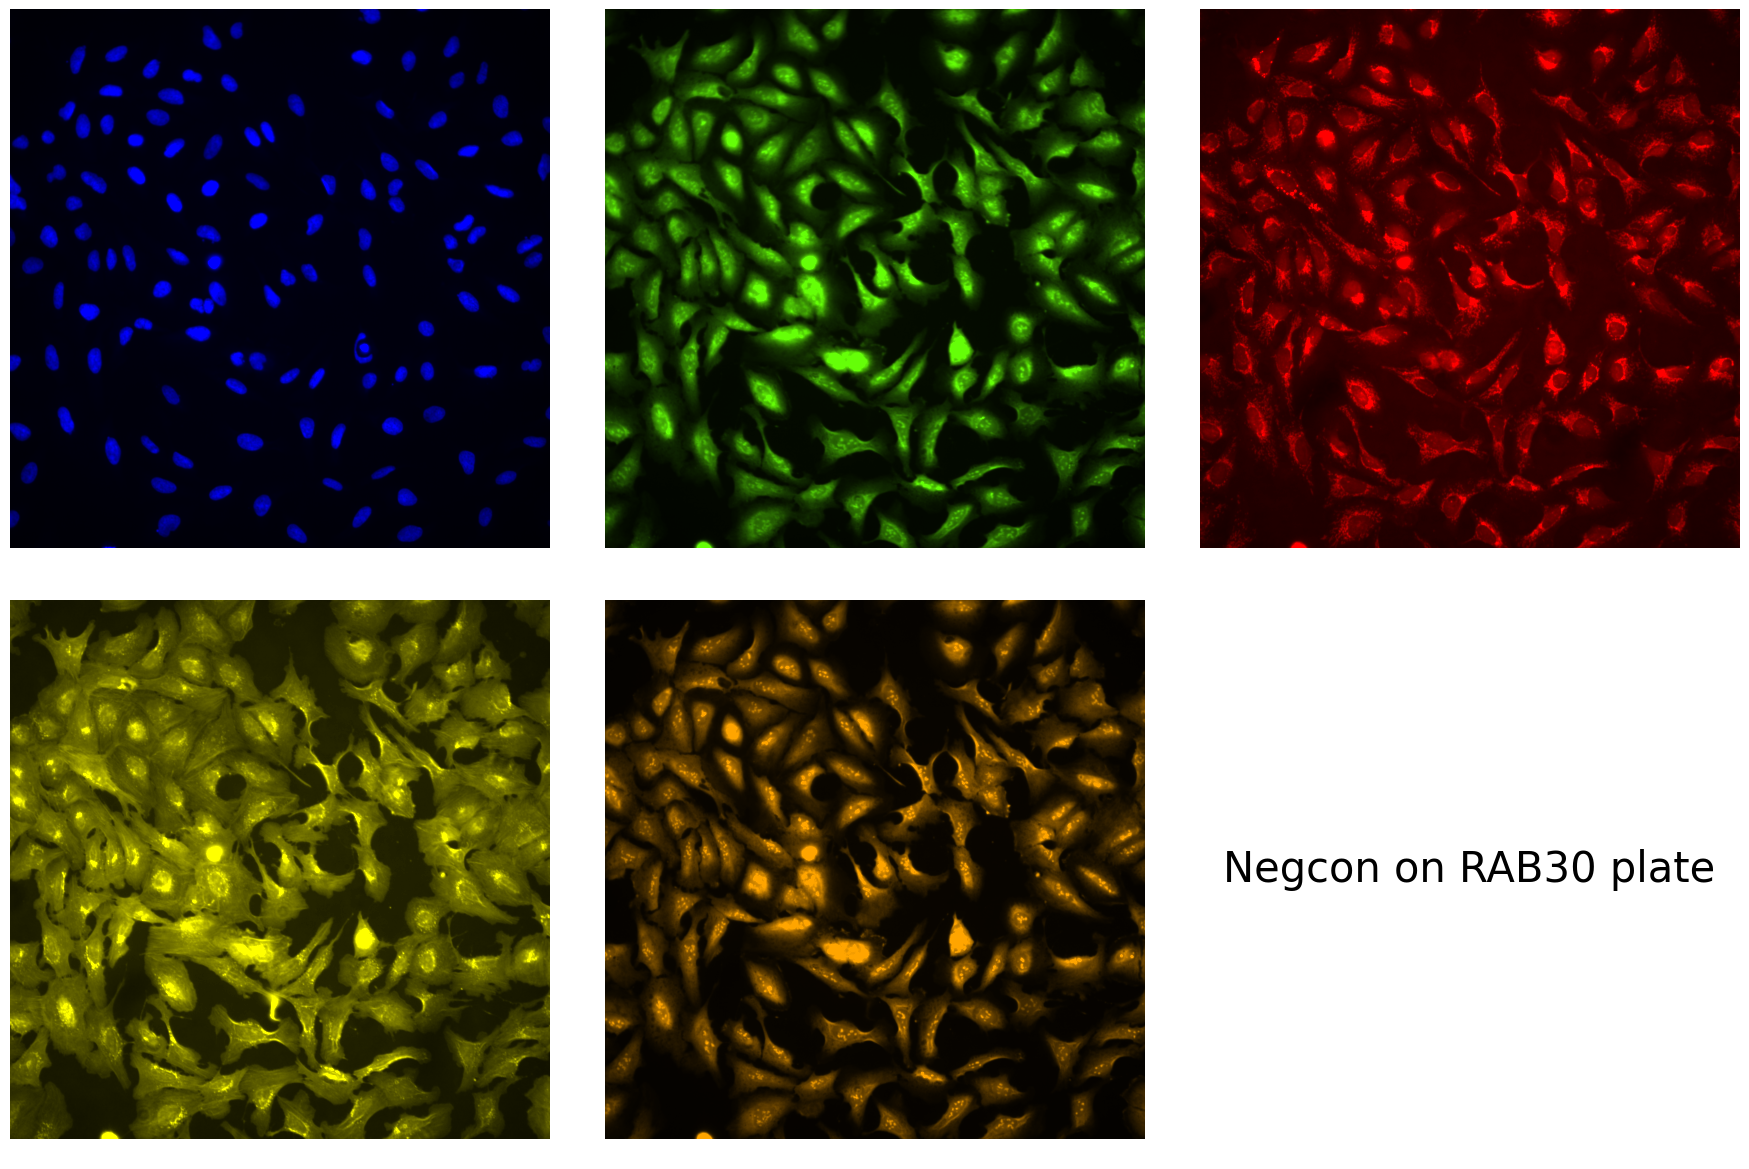

In [9]:
plot_gene(gene="RAB30", img_ind=100, int_percentile=99.25, img_type="control")